In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
## the fuction is set to use the worse case situation, 
##if you want to use best case, put survival_case=1 or reproduction_case=1 for best case
def bobcat_P(N,P_1,survival_case=None,reproduction_case=None):
    W_S=np.zeros((16,16))
    W_S_list=[0.32]+[0.68]*15
    np.fill_diagonal(W_S, W_S_list)   #Worst case survival rate matrix
    
    B_S=np.zeros((16,16))
    B_S_list=[0.34]+[0.71]*15
    np.fill_diagonal(B_S, B_S_list)   #Best case survival rate matrix
    
    W_R=np.zeros((16,16))
    W_R_list=[0.6]*2+[1.15]*14
    np.fill_diagonal(W_R, W_R_list)   #Worst case reproduction rate matrix
    
    B_R=np.zeros((16,16))
    B_R_list=[0.63]*2+[1.2]*14
    np.fill_diagonal(B_R, B_R_list)   #Worst case reproduction rate matrix
    
    sum_population=np.zeros(N)
    P_matrix=P_1
    
    
    if survival_case==1:   ##set cases
        S=B_S
    else:
        S=W_S
    if reproduction_case==1:
        R=B_R
    else:
        R=W_R
        
        
    for t in np.arange(N):
        if t==0:
            sum_population[t]=np.sum(P_1)
        else:
            if t ==1:
                survivaled_P=np.dot(S,P_1)
            else:
                survivaled_P=np.dot(S,new_population)
            reproducted_P=np.dot(R,survivaled_P)
            new_survivaled_P=survivaled_P
            for i in np.arange(len(survivaled_P))[::-1]:
                if i!=0:
                    new_survivaled_P[i]=survivaled_P[i-1]
                else:
                    new_survivaled_P[i]=0       
            new_survivaled_P[0]=np.sum(reproducted_P)
            new_population=new_survivaled_P
            sum_population[t]=np.sum(new_population)
            P_matrix=np.hstack((P_matrix,new_population))
    print('total population in each year:',sum_population)
    print('population distribution by age in each year:',
          P_matrix)
    df = pd.DataFrame({
        'Year': np.arange(1,N+1),
        'Population': sum_population})
    plot=sns.lineplot(data=df,x='Year',y='Population')
    return plot
##P_1 is the initial 16 by 1 matrix represents the number of bobcats in each age group from 1 to 16, the sum of P_1 is the
## total bobcats population in that year

total population in each year: [160.         228.695      223.927629   214.81384192 215.3556587
 216.99075069 218.74759989 221.23081847 224.25823896 227.6344257 ]
population distribution by age in each year: [[ 10.         125.895      113.176329   101.27957706 102.85244255
  103.94786611 104.4258802  105.46711024 106.85294216 108.40514965]
 [ 10.           3.4         42.8043      38.47995186  34.4350562
   34.96983047  35.34227448  35.50479927  35.85881748  36.33000034]
 [ 10.           7.1          2.414       30.391053    27.32076582
   24.4488899   24.82857963  25.09301488  25.20840748  25.45976041]
 [ 10.           7.1          5.041        1.71394     21.57764763
   19.39774373  17.35871183  17.62829154  17.81604056  17.89796931]
 [ 10.           7.1          5.041        3.57911      1.2168974
   15.32012982  13.77239805  12.3246854   12.51608699  12.6493888 ]
 [ 10.           7.1          5.041        3.57911      2.5411681
    0.86399715  10.87729217   9.77840262   8.75052663

<AxesSubplot:xlabel='Year', ylabel='Population'>

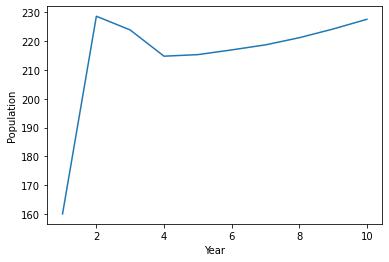

In [26]:
P_1=np.array([[10]*16])   # here I used a 16 by 1 matrix with 10 in each entry as the initial condition, which means we have 10 bobcats
                        ## in each age group and in total we have 160 bobcats initially.
P_1=P_1.transpose()

bobcat_P(10,P_1,survival_case=1,reproduction_case=1)